<a href="https://colab.research.google.com/github/DavidKNam/MNN/blob/master/MNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Neural Network - MNIST Data





## Task 1: Implement MLP and test on XOR Data

In [0]:
import numpy as np

class Layer:
    def __init__(self, num_neurons, num_inputs, bias=None):
      if bias is None:
        self.bias = 1
      else:
        self.bias = bias
      self.num_inputs = num_inputs
      self.weights = 2 * np.random.random((num_inputs, num_neurons)) - 1

class Network:
    def __init__(self, epochs, learning_rate, input_count, hidden_count, output_count):
        self.epochs = epochs
        self.lrate = learning_rate
        self.hidden_layer = Layer(hidden_count, input_count)
        self.output_layer = Layer(output_count, hidden_count)

    # Sigmoid Function
    def sigmoid(self, x):
        return 1.0/(1+np.exp(-x))

    # Derivative of Sigmoid Function
    def d_sigmoid(self, x):
        return x * (1 - x)

    # Delta Function
    def delta(self, x, y):
        # Get delta of derivative mse and derivative sigmoid
        d = x * self.d_sigmoid(y)
        return d

    # Error Function
    def calculate_error(self, generated_output, expected_output):
        return np.absolute(np.subtract(generated_output, expected_output))

    # Loss Function
    def nll(self, x, y):
        return - np.mean(np.multiply(y, np.log(x)) + np.multiply((1-y), np.log(1-x)))

    # Softmax Function
    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis = 1).reshape(-1,1)

    def feed_forward(self, inputs):
        # Process data through hidden layer and then pass the output of it to the output layer
        hidden_layer_output = self.sigmoid(np.dot(inputs, self.hidden_layer.weights) + self.hidden_layer.bias)
        # Softmax for multi-class classification
        output_layer_output = self.softmax(np.dot(hidden_layer_output, self.output_layer.weights) + self.output_layer.bias)
        return hidden_layer_output, output_layer_output
    
    def train(self, training_data, training_output):
        print("Started Training...")
        for e in range(self.epochs):
        
          # Process training data
          hidden_layer_output, output_layer_output = self.feed_forward(training_data)

          # Errors for Output Neurons
          output_layer_errors = training_output - output_layer_output

          # Delta for Output Neurons (Not Needed w/ Softmax)
          output_layer_delta = self.delta(output_layer_errors, output_layer_output)

          # Errors for Hidden Neurons
          hidden_layer_error = output_layer_errors.dot(self.output_layer.weights.T)

          # Delta for Hidden Neurons
          hidden_layer_delta = self.delta(hidden_layer_error, hidden_layer_output)

          # Get adjustment values for Hidden Layer
          hidden_layer_adjustment = training_data.T.dot(hidden_layer_delta)

          # Get adjustment values for Output Layer
          output_layer_adjustment = hidden_layer_output.T.dot(output_layer_errors)

          # Adjust the weights for Hidden Layer
          self.hidden_layer.weights += (self.lrate * hidden_layer_adjustment)
            
          # Adjust the weights for Output Layer
          self.output_layer.weights += (self.lrate * output_layer_adjustment)

          # Print Output
          print("--------Epoch {}--------".format(str(e+1)))
          print("Training Output: {}".format(output_layer_output.tolist()))
          print("Expected Output: {}".format(training_output.tolist()))

          # Calculate Error (Negative Log Likelihood)  
          error = self.nll(output_layer_output, training_output)
          print("Error: {}".format(error))

          # Stopping Condition
          if np.all(error < 0.04):
            print("Training Stopped. Error Less Than 0.04 After Epoch: {}".format(e + 1))
            break

        print("Training Complete. Reached Given Epoch: {}".format(e + 1))


    def predict(self, test_inputs, test_output):
        print("Start Predicting...")
        hidden, test_predict_original = self.feed_forward(test_inputs)
        # Winner Take All
        test_predict = np.where(test_predict_original == test_predict_original.max(axis=1, keepdims=True), 1, 0)
        print("Given Input: {}".format(test_inputs.tolist()))
        print("Predicted Output: {}".format(test_predict.tolist()))
        print("Expected Output: {}".format(test_output.tolist()))
        print("Error: {}".format(self.nll(test_predict_original, test_output)))
        return test_predict

# Create Training Set
X_train = np.array([[0, 0], [0, 1], [1, 0],[1, 1]])
y_train = np.array([[1, 0], [0, 1], [0, 1],[1, 0]])

# Create Test Set
X_test = np.array([[1, 1], [1, 0], [0, 1],[0, 0]])
y_test = np.array([[1, 0], [0, 1], [0, 1],[1, 0]])

# Set Parameters
epoch = 1000
learning_rate = 0.9
hidden_nodes = 10

# Initialize Network
ann = Network(epoch, learning_rate, X_train.shape[1], hidden_nodes, y_train.shape[1])

# Train Network
ann.train(X_train, y_train)

# Test Network
ann.predict(X_test, y_test)

Started Training...
--------Epoch 1--------
Training Output: [[0.36496747135890445, 0.6350325286410956], [0.4070226051758127, 0.5929773948241873], [0.3887962122471287, 0.6112037877528713], [0.433428795033918, 0.566571204966082]]
Expected Output: [[1, 0], [0, 1], [0, 1], [1, 0]]
Error: 0.7147246614532187
--------Epoch 2--------
Training Output: [[0.9652054350099858, 0.03479456499001418], [0.9641505040152464, 0.035849495984753545], [0.9739016498952793, 0.02609835010472061], [0.9735324547207723, 0.02646754527922764]]
Expected Output: [[1, 0], [0, 1], [0, 1], [1, 0]]
Error: 1.7591368457226442
--------Epoch 3--------
Training Output: [[5.185527250444748e-07, 0.9999994814472749], [1.5054567175201388e-06, 0.9999984945432825], [3.5483281470245305e-07, 0.9999996451671853], [1.015191397298026e-06, 0.9999989848086026]]
Expected Output: [[1, 0], [0, 1], [0, 1], [1, 0]]
Error: 7.068164845369942
--------Epoch 4--------
Training Output: [[0.9849690741652611, 0.015030925834738808], [0.9725551874088094

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0]])

As shown above, the network is trained on the XOR problem (M = 4 binary input patterns of length N = 2). The problem is also treated as a 2-class problem (C = 2). It stops once the error is less than 0.04.

To test the model, the following inputs were given:

[[1, 1], [1, 0], [0, 1],[0, 0]]

The predicted output is the following:

[[1, 0], [0, 1], [0, 1], [1, 0]]

Where the expected output is the following:

[[1, 0], [0, 1], [0, 1], [1, 0]]

The error for the model is:

0.03832742292549991

## Task 2: Load MNIST and Implement K-Fold

Load MNIST Data

In [0]:
from sklearn.datasets import fetch_openml
print("Downloading MNIST Dataset...")
mnist = fetch_openml('mnist_784', version=1, cache=True)
print("MNIST Dataset Download Complete.")
print(mnist.data.shape)

MNIST Dataset Download Complete.
(70000, 784)


Data Settings

In [0]:
image_size = 28
num_labels = 10
image_pixels = image_size * image_size
folds = 10

Display One Picture of each number randomly selected from the data set along with its category

MNIST Target: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Class 0


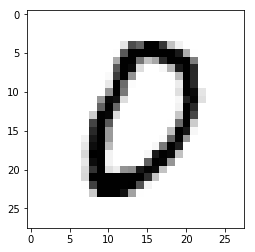

Class 1


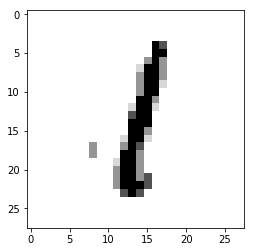

Class 2


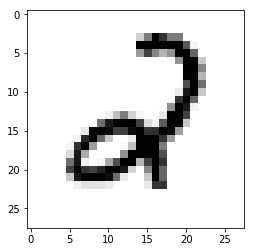

Class 3


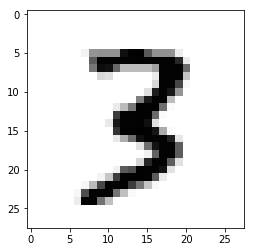

Class 4


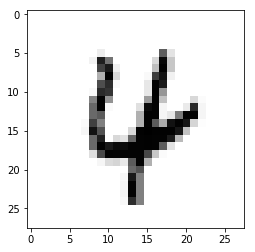

Class 5


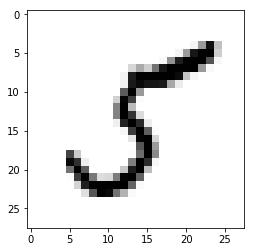

Class 6


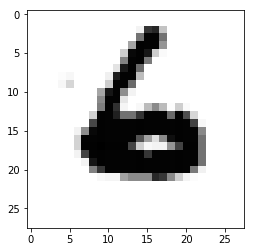

Class 7


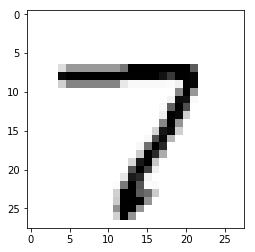

Class 8


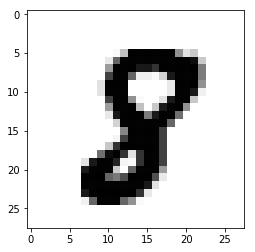

Class 9


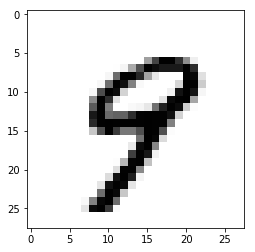

In [0]:
import numpy as np
import matplotlib.pyplot as plt
print("MNIST Target: " + str(np.unique(mnist.target)))

for i in range(num_labels):
  print("Class " + str(i))
  index = np.random.choice(np.argwhere(mnist.target == str(i)).ravel(), 1)
  img = mnist.data[index,:]
  img = img.reshape(image_size, image_size)
  plt.imshow(img, interpolation='nearest', cmap="Greys")
  plt.show()

Randomize the data and generate 10 equal-sized folds of data. Run statistics on each fold to compute how many instances of each category each fold has.

In [0]:
def randomize_split_data(num_folds, data_size):
  all_fold_index = []
  index_list = np.random.permutation(data_size)
  fold_size = int(data_size/num_folds)
  for x in range(num_folds):
    beginning_index = x * fold_size
    ending_index = (x + 1) * fold_size
    all_fold_index.append(index_list[beginning_index : ending_index])
  return all_fold_index

fold_indices = randomize_split_data(folds, mnist.data.shape[0])
values, count = np.unique(mnist.target, return_counts=True)
values = (10 * '{:5} ').format(*values)

for fold_count, indices in enumerate(fold_indices):
  _, count = np.unique(mnist.target[indices], return_counts=True)
  stat = count / np.size(indices) * 100
  stat = (10 * '{:05.2f} ').format(*stat)
  print("Fold Number: {}".format(fold_count + 1))
  print("Class:   ", values)
  print("Percent: ", stat + '\n')


Fold Number: 1
Class:    0     1     2     3     4     5     6     7     8     9     
Percent:  10.53 11.24 09.31 09.84 09.67 08.77 09.71 10.61 10.26 10.04 

Fold Number: 2
Class:    0     1     2     3     4     5     6     7     8     9     
Percent:  09.34 11.33 10.67 10.86 09.69 09.00 09.84 10.09 09.13 10.06 

Fold Number: 3
Class:    0     1     2     3     4     5     6     7     8     9     
Percent:  09.23 10.90 09.84 10.24 10.14 09.09 09.70 10.61 09.87 10.37 

Fold Number: 4
Class:    0     1     2     3     4     5     6     7     8     9     
Percent:  09.94 10.61 09.90 10.09 09.46 09.37 09.91 10.56 10.33 09.83 

Fold Number: 5
Class:    0     1     2     3     4     5     6     7     8     9     
Percent:  09.76 11.11 09.80 10.51 10.01 08.80 09.24 10.37 10.54 09.84 

Fold Number: 6
Class:    0     1     2     3     4     5     6     7     8     9     
Percent:  09.96 11.94 10.50 10.06 09.67 09.01 10.23 09.97 08.90 09.76 

Fold Number: 7
Class:    0     1     2     3     4  

Put 8 fold together to generate a train set and keep one fold for validation and one fold for final testing.

In [0]:
def one_hot_encode(x):
  sample_size = np.size(x)
  encoded = np.zeros((sample_size, num_labels))
  encoded[np.arange(sample_size), x.astype(int)] = 1
  return encoded

x_train = np.concatenate([mnist.data[indices] for indices in fold_indices[:8]])/image_pixels
y_train = one_hot_encode(np.concatenate([mnist.target[indices] for indices in fold_indices[:8]]))

x_val = mnist.data[fold_indices[8]]/image_pixels
y_val = one_hot_encode(mnist.target[fold_indices[8]])

x_test = mnist.data[fold_indices[9]]/image_pixels
y_test = one_hot_encode(mnist.target[fold_indices[9]])

print("Train X Shape: {}, Train Y: {}".format(x_train.shape, y_train.shape))
print("Val X Shape: {}, Val Y: {}".format(x_val.shape, y_val.shape))
print("Test X Shape: {}, Test Y Shape: {}".format(x_test.shape, y_test.shape))

Train X Shape: (56000, 784), Train Y: (56000, 10)
Val X Shape: (7000, 784), Val Y: (7000, 10)
Test X Shape: (7000, 784), Test Y Shape: (7000, 10)


## Task 3: Train and Test Neural Network on MNIST Data

In [0]:
import numpy as np

class Layer:
    def __init__(self, num_neurons, num_inputs, bias=None):
      if bias is None:
        self.bias = 1
      else:
        self.bias = bias
      self.num_inputs = num_inputs
      self.weights = 2 * np.random.random((num_inputs, num_neurons)) - 1

class Network:
    def __init__(self, epochs, learning_rate, input_count, hidden_count, output_count):
        self.epochs = epochs
        self.lrate = learning_rate
        self.hidden_layer = Layer(hidden_count, input_count)
        self.output_layer = Layer(output_count, hidden_count)
        self.history = np.array([[],[],[],[]])

    # Sigmoid Function
    def sigmoid(self, x):
        return 1.0/(1+np.exp(-x))

    # Derivative of Sigmoid Function
    def d_sigmoid(self, x):
        return x * (1 - x)

    # Delta Function
    def delta(self, x, y):
        # Get delta of derivative mse and derivative sigmoid
        d = x * self.d_sigmoid(y)
        return d

    # Error Function
    def calculate_error(self, generated_output, expected_output):
        return np.absolute(np.subtract(generated_output, expected_output))

    # Loss Function
    def nll(self, x, y):
        return - np.mean(np.multiply(y, np.log(x)) + np.multiply((1-y), np.log(1-x)))

    # Softmax Function
    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis = 1).reshape(-1,1)

    # Accuracy Function
    def accuracy(self, x, y):
        return np.sum(np.all(x == y, axis=1)) / y.shape[0] * 100

    def feed_forward(self, inputs):
        # Process data through hidden layer and then pass the output of it to the output layer
        hidden_layer_output = self.sigmoid(np.dot(inputs, self.hidden_layer.weights) + self.hidden_layer.bias)
        # Softmax for multi-class classification
        output_layer_output = self.softmax(np.dot(hidden_layer_output, self.output_layer.weights) + self.output_layer.bias)
        return hidden_layer_output, output_layer_output
    
    def train(self, training_data, training_output, validation_data, validation_output):
        print("Started Training...")
        for e in range(self.epochs):
        
          # Process training data
          hidden_layer_output, output_layer_output = self.feed_forward(training_data)

          # Calculate Training Error          
          error = self.nll(output_layer_output, training_output)

          # Get Training Prediction
          train_prediction = np.where(output_layer_output == output_layer_output.max(axis=1, keepdims=True), 1, 0)
          
          # Calculate Training Accuracy
          train_accuracy = self.accuracy(train_prediction, training_output)

          # Process Validation Data Before Weights are Updated
          val_hidden_layer_output, val_output_layer_output = self.feed_forward(validation_data)

          # Calculate Validation Error
          val_error = self.nll(val_output_layer_output, validation_output)

          # Get Validation Prediction
          val_prediction = np.where(val_output_layer_output == val_output_layer_output.max(axis=1, keepdims=True), 1, 0)

          # Calculate Validation Accuracy
          val_accuracy = self.accuracy(val_prediction, validation_output)

          # Update History (Keep Track)
          self.history = np.append(self.history, [[error], [val_error], [train_accuracy], [val_accuracy]], axis = 1)

          # Errors for Output Neurons
          output_layer_errors = training_output - output_layer_output

          # Delta for Output Neurons (Not Needed w/ Softmax)
          output_layer_delta = self.delta(output_layer_errors, output_layer_output)

          # Errors for Hidden Neurons
          hidden_layer_error = output_layer_errors.dot(self.output_layer.weights.T)

          # Delta for Hidden Neurons
          hidden_layer_delta = self.delta(hidden_layer_error, hidden_layer_output)

          # Get adjustment values for Hidden Layer
          hidden_layer_adjustment = training_data.T.dot(hidden_layer_delta)

          # Get adjustment values for Output Layer
          output_layer_adjustment = hidden_layer_output.T.dot(output_layer_errors)

          # Adjust the weights for Hidden Layer
          self.hidden_layer.weights += (self.lrate * hidden_layer_adjustment)
            
          # Adjust the weights for Output Layer
          self.output_layer.weights += (self.lrate * output_layer_adjustment)

          # Process Validation Data after Weights are Updated
          val_hidden_layer_output, val_output_layer_output = self.feed_forward(validation_data)

          # Calculate New Validation Error
          val_error_new = self.nll(val_output_layer_output, validation_output)

          if e % 100 == 0:
              print("Epoch: {}, Error: {:.2f}, Old Val Error: {:.2f}, New Val Error: {:.2f}".format((e + 1), error, val_error, val_error_new))

          # Stopping Condition
          if val_error_new > val_error:
            print("Training Stopped. Validation Cost Increasing After Epoch: {}".format(e + 1))
            break

        print("Training Complete. Reached Given Epoch: {}".format(e + 1))
        return self.history


    def predict(self, test_inputs, test_output):
        print("Start Predicting...")
        hidden, test_predict_original = self.feed_forward(test_inputs)
        # Winner Take All
        test_predict = np.where(test_predict_original == test_predict_original.max(axis=1, keepdims=True), 1, 0)
        return test_predict

# Set Parameters
epoch = 1000
learning_rate = 0.000009
hidden_nodes = 40
# Initialize Network
ann = Network(epoch, learning_rate, x_train.shape[1], hidden_nodes, y_train.shape[1])

# Train Network
history = ann.train(x_train, y_train, x_val, y_val)

# Test Network
prediction = ann.predict(x_test, y_test)
print("Test Accuracy: {:.2f}%".format(ann.accuracy(prediction, y_test)))

Started Training...
Epoch: 1, Error: 0.65, Old Val Error: 0.65, New Val Error: 0.42
Epoch: 101, Error: 0.16, Old Val Error: 0.16, New Val Error: 0.16
Epoch: 201, Error: 0.12, Old Val Error: 0.12, New Val Error: 0.12
Epoch: 301, Error: 0.10, Old Val Error: 0.10, New Val Error: 0.10
Epoch: 401, Error: 0.09, Old Val Error: 0.09, New Val Error: 0.09
Epoch: 501, Error: 0.08, Old Val Error: 0.08, New Val Error: 0.08
Epoch: 601, Error: 0.07, Old Val Error: 0.08, New Val Error: 0.08
Epoch: 701, Error: 0.07, Old Val Error: 0.07, New Val Error: 0.07
Epoch: 801, Error: 0.07, Old Val Error: 0.07, New Val Error: 0.07
Epoch: 901, Error: 0.06, Old Val Error: 0.07, New Val Error: 0.07
Training Complete. Reached Given Epoch: 1000
Start Predicting...
Test Accuracy: 89.83%


Plot the training and validation learning curves

1000


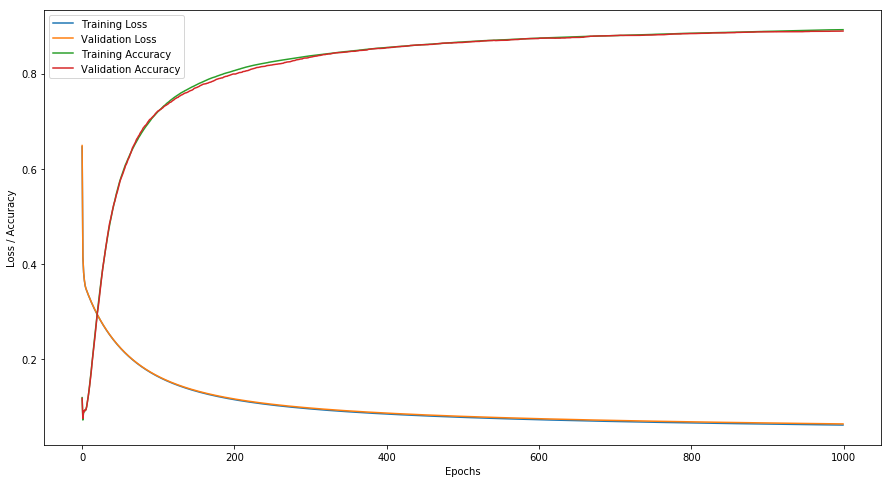

In [0]:
fig, ax = plt.subplots(figsize=(15, 8))
print(history.shape[1])
ax.plot(np.arange(history.shape[1]), history[0], label = "Training Loss")
ax.plot(np.arange(history.shape[1]), history[1], label = "Validation Loss")
ax.plot(np.arange(history.shape[1]), history[2]/100, label = "Training Accuracy")
ax.plot(np.arange(history.shape[1]), history[3]/100, label = "Validation Accuracy")
ax.legend()
ax.set_ylabel("Loss / Accuracy")
ax.set_xlabel("Epochs")
plt.show()